
## 1. Definição do Problema

O conjunto de dados utilizado neste projeto é o Titanic Dataset, disponibilizado na plataforma Kaggle (https://www.kaggle.com/datasets/ashishkumarjayswal/titanic-datasets
).
Trata-se de um dataset voltado para problemas de Aprendizado Supervisionado, mais especificamente de Classificação binária.

O arquivo reúne informações pessoais e socioeconômicas de passageiros do navio Titanic, além de dados sobre suas viagens. Cada registro no conjunto de dados representa um passageiro, com atributos que descrevem aspectos como idade, sexo, classe social, valor pago pela passagem, número de familiares a bordo e porto de embarque. O campo de interesse é a variável Survived, que indica se o passageiro sobreviveu ou não ao naufrágio.

O dataset contém 891 registros e 12 atributos, sendo que alguns possuem valores faltantes (como idade e cabine), o que exige tratamento adequado durante o pré-processamento. A variável-alvo (Survived) é binária, assumindo o valor 1 para passageiros que sobreviveram e 0 para os que não sobreviveram.

O objetivo principal do conjunto de dados é auxiliar na construção de modelos que possam prever, com base nos atributos fornecidos, a probabilidade de sobrevivência de um passageiro. Dessa forma, além da tarefa de classificação, a análise permite investigar quais fatores mais contribuíram para as chances de sobrevivência, revelando padrões relacionados a gênero, idade, classe e outras características.


**Definição dos atributos presentes no Dataset:**

1. **PassengerId:** Identificador numérico único para cada passageiro.
2. **Survived:** Variável alvo do problema, sendo:
  * 0 = não sobreviveu
  * 1 = sobreviveu
3. **Pclass:** Classe do passageiro no navio (1ª, 2ª ou 3ª), representando status socioeconômico.
4. **Name:** Nome completo do passageiro, do qual podem ser extraídos títulos (Mr., Mrs., Miss, etc.) relevantes para análise.
5. **Sex:** Sexo do passageiro (masculino/feminino).
6. **Age:** Idade do passageiro em anos.
7. **SibSp:** Quantidade irmãos e/ou cônjuges a bordo.
8. **Parch:** Quantidade de pais e/ou filhos a bordo.
9. **Ticket:** Número do bilhete, podendo conter padrões ou indicar grupo de viagem.
10. **Fare:** Valor da tarifa paga pelo passageiro.
11. **Cabin:** Código da cabine, com muitos valores ausentes; pode indicar localização dentro do navio.
12. **Embarked:** Indica o porto de embarque do passageiro:
  * C = Cherbourg
  * Q = Queenstown
  * S = Southampton

# New Section

## 2. Premissas e Hipóteses




**Premissas**

Neste caso, algumas premissas que podem ser levadas em consideração são as seguintes:

* Fatores demográficos e socioeconômicos, como sexo, idade e classe do bilhete, podem influenciar diretamente nas chances de sobrevivência.

* Passageiros que estavam acompanhados de familiares (atributos SibSp e Parch) tiveram maior probabilidade de receber ajuda durante a evacuação.

* O valor da tarifa (Fare) e o porto de embarque (Embarked) refletem diferenças sociais e econômicas que podem ter impactado a probabilidade de sobrevivência.

* Atributos do dataset com muitos valores ausentes, como **Cabin**, tendem a ter importância limitada, a menos que sejam tratados e transformados adequadamente.

**Hipóteses**

* Passageiros do sexo feminino e crianças apresentaram maiores chances de sobrevivência, baseando-se na regra amplamente documentada de evacuação *“women and children first”*.

* Indivíduos pertencentes às classes mais altas (Pclass = 1) tiveram maior taxa de sobrevivência em comparação às classes mais baixas.

* O valor da tarifa (Fare) está positivamente correlacionado com a chance de sobrevivência.

* Passageiros que embarcaram em Cherbourg (Embarked = C) possuíam maior probabilidade de sobrevivência do que aqueles que embarcaram em Southampton (Embarked = S) ou Queenstown (Embarked = Q), já que historicamente, Cherbourg concentrou mais passageiros da primeira classe, enquanto Southampton tinha maior número de passageiros da terceira classe.

## 2. Importação das bibliotecas

In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from matplotlib import cm
from pandas import set_option
import matplotlib.pyplot as plt
from scipy import stats
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay


In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Importação do Dataset

Primeiramente, utilizando o pacote Pandas iremos carregar o Dataset (arquivo .csv), e explorá-lo em seguida.

In [ ]:
# Carregamento do arquivo .csv

# URL de importação do Dataset
url = "https://raw.githubusercontent.com/lepanegossi/MVP_PUC_Machine_Learning/refs/heads/main/titanic.csv"


# Carga do Dataset citando a variável URL
df_origem = pd.read_csv(url, delimiter=',')

## 3. Pré-Visualização de Dados






In [ ]:
# Visualização das primeiras 5 linhas do Dataset
df_origem.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Visualização das últimas 5 linhas do Dataset
df_origem.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Visualizando as informações gerais do Dataset, é possível verificar o número de linhas (418) e colunas (12), além dos tipos dos dados.

In [ ]:
# Informações gerais sobre o dataset
print("Dimensões do dataset:", df_origem.shape)
print("\nInformações do dataset:")
print(df_origem.info())

Dimensões do dataset: (418, 12)

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


Através do resultado acima, observa-se:

* **Nulos**: Algumas colunas apresentam valores ausentes. Sendo:

  *   **Age**: 86 registros estão faltando (~20% do dataset);
  *   **Fare:** 1 registro está faltando.
  *   **Cabin:** 327 registros estão faltando (~80% do dataset).

* **Uso de memória**: É de aproximadamente 39 KB.

* **Tipos de dados**: Há registros do tipo string (object), como Name, Sex, Ticket e Embarked; valores numéricos do tipo inteiro (int64), como PassengerId, Survived, Pclass, SibSp, Parch e Cabin_known; e valores decimais do tipo float64, como Age e Fare.


## 4. Pré-processamento de Dados Inicial




In [ ]:
# Criação de uma cópia do Dataset para ser utilizada nos processos seguintes
df_final = df_origem.copy()

In [ ]:
# Criação de uma coluna tipo binária para indicar se a cabine é conhecida
df_final['Cabin_known'] = df_final['Cabin'].notnull().astype(int)

# Substituição de valores faltantes de Age pela mediana
df_final['Age'].fillna(df_final['Age'].median(), inplace=True)

# Substituição do valor faltante de Fare pela mediana
df_final['Fare'].fillna(df_final['Fare'].median(), inplace=True)

# Remoção de colunas que não serão utilizadas ou são pouco relevantes
df_final.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

# Conferir se restaram nulos
print(df_final.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Cabin_known    0
dtype: int64


A partir da cópia do dataset original (**df_origem**), foram realizadas algumas alterações em df_final para garantir que os dados estejam consistentes e prontos para análise exploratória e modelagem:

* **Age**: os 86 valores faltantes foram preenchidos com a mediana da coluna. Essa alteração preserva a distribuição da idade sem descartar registros importantes.

* **Fare**: o único valor faltante foi substituído pela mediana, evitando problemas em operações futuras de modelagem.

* **Cabin**: Como mais de 75% dos registros estavam ausentes, a coluna original foi removida. Em seu lugar, foi criada a variável binária *Cabin_known*, indicando se o passageiro possuía uma cabine registrada (1) ou não (0), permitindo aproveitar a informação de forma simplificada.

Colunas textuais pouco informativas (**Name e Ticket**) também foram removidas, pois não agregam valor direto para a modelagem e poderiam gerar complexidade desnecessária na análise final.


In [ ]:
# Criando variáveis dummies para Sex e Embarked
df_final = pd.get_dummies(df_final, columns=['Sex', 'Embarked'], drop_first=True)

# Convertendo True/False para 0/1
for col in ['Sex_male', 'Embarked_Q', 'Embarked_S']:
    if col in df_final.columns:  # só converte se a coluna existir
        df_final[col] = df_final[col].astype(int)

# Conferindo as primeiras linhas
df_final.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_known,Sex_male,Embarked_Q,Embarked_S
0,892,0,3,34.5,0,0,7.8292,0,1,1,0
1,893,1,3,47.0,1,0,7.0000,0,0,0,1
2,894,0,2,62.0,0,0,9.6875,0,1,1,0
3,895,0,3,27.0,0,0,8.6625,0,1,0,1
4,896,1,3,22.0,1,1,12.2875,0,0,0,1


In [ ]:
#Visualizando os valores iniciais e finais do dataset, após alteração
display(df_final)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_known,Sex_male,Embarked_Q,Embarked_S
0,892,0,3,34.5,0,0,7.8292,0,1,1,0
1,893,1,3,47.0,1,0,7.0000,0,0,0,1
2,894,0,2,62.0,0,0,9.6875,0,1,1,0
3,895,0,3,27.0,0,0,8.6625,0,1,0,1
4,896,1,3,22.0,1,1,12.2875,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,27.0,0,0,8.0500,0,1,0,1
414,1306,1,1,39.0,0,0,108.9000,1,0,0,0
415,1307,0,3,38.5,0,0,7.2500,0,1,0,1
416,1308,0,3,27.0,0,0,8.0500,0,1,0,1


Após essas alterações, todas as colunas do dataset df_final estão completas, sem valores ausentes, e prontas para os próximos passos de análise exploratória, pré-processamento e modelagem.

## 5. Preparação de Dados

### 5.1. Engenharia de Features

Neste ponto, será criada a variável FamilySize = SibSp + Parch para representar o tamanho da família de cada passageiro a bordo
Também será criada a variável IsAlone para representar passageiros que viajavam sozinhos.

Isso será feito pois passageiros com famílias muito pequenas ou muito grandes podem ter probabilidades diferentes de sobrevivência e a feature fornece uma nova perspectiva que não estava explícita nas colunas originais do dataset, permitindo melhorar o poder preditivo do modelo, e que se capture relações importantes.



In [ ]:
# 1. Criando FamilySize: número de familiares a bordo
df_final['FamilySize'] = df_final['SibSp'] + df_final['Parch']

# 2. Criando FamilySize_total: inclui o próprio passageiro
df_final['FamilySize_total'] = df_final['FamilySize'] + 1

# 3. Criando IsAlone: 1 se estiver sozinho, 0 se acompanhado
df_final['IsAlone'] = 0
df_final.loc[df_final['FamilySize_total'] == 1, 'IsAlone'] = 1

### 5.2. Transformação de Variáveis Categóricas

A partir do One-Hot Encoding foram criadas colunas binárias para as variáveis **Sex** e **Embarked**, sendo transformadas em variáveis dummy (**Sex_male** e **Embarked_Q**, **Embarked_S**), onde 0 representa passageiras do sexo feminino e 1 representa passageiros do sexo masculino.

Essa transformação é necessária porque modelos de machine learning não conseguem trabalhar diretamente com variáveis categóricas (strings), e precisam de entradas numéricas.

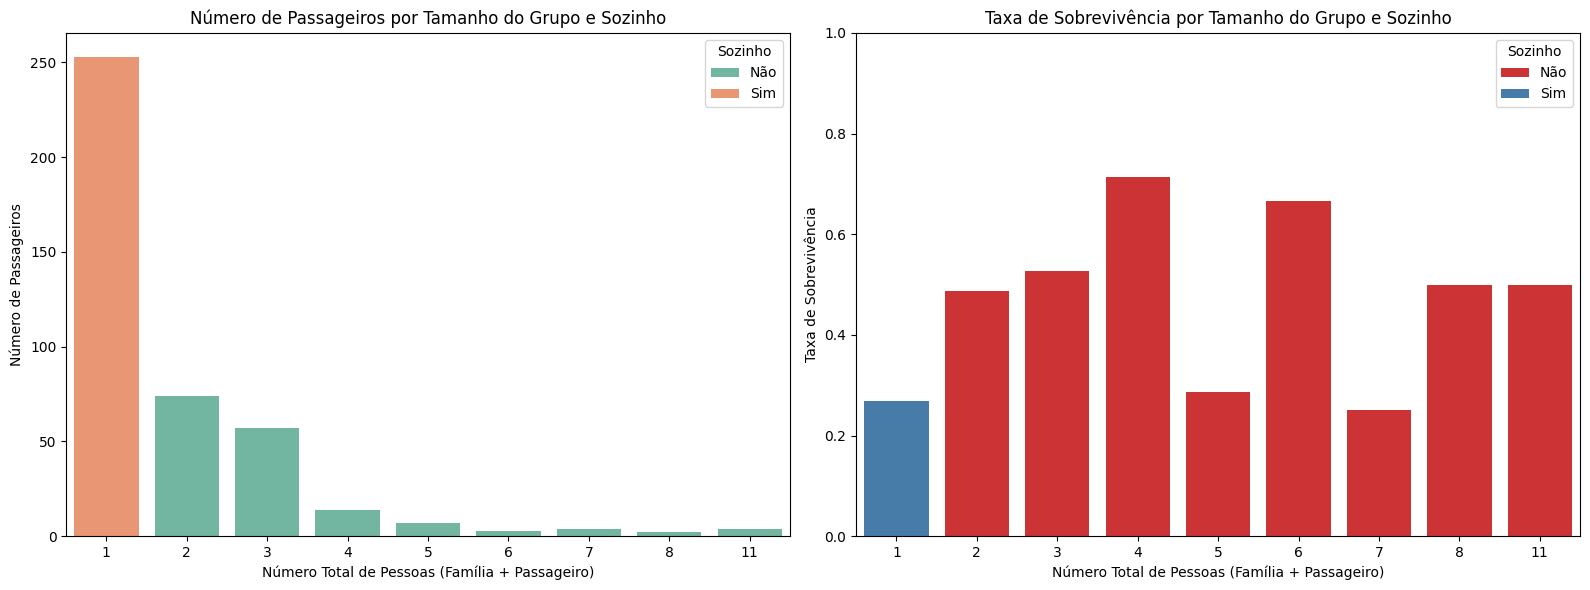

In [ ]:
# Número de passageiros e taxa de sobrevivência
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Número de passageiros por FamilySize_total e IsAlone
sns.countplot(x='FamilySize_total', hue='IsAlone', data=df_final, palette='Set2', ax=axes[0])
axes[0].set_title('Número de Passageiros por Tamanho do Grupo e Sozinho')
axes[0].set_xlabel('Número Total de Pessoas (Família + Passageiro)')
axes[0].set_ylabel('Número de Passageiros')
axes[0].legend(title='Sozinho', labels=['Não', 'Sim'])

# Taxa de sobrevivência por FamilySize_total e IsAlone
# Calculando taxa de sobrevivência
survival_rate = df_final.groupby(['FamilySize_total','IsAlone'])['Survived'].mean().reset_index()

barplot = sns.barplot(x='FamilySize_total', y='Survived', hue='IsAlone', data=survival_rate, palette='Set1', ax=axes[1])
axes[1].set_title('Taxa de Sobrevivência por Tamanho do Grupo e Sozinho')
axes[1].set_xlabel('Número Total de Pessoas (Família + Passageiro)')
axes[1].set_ylabel('Taxa de Sobrevivência')
axes[1].set_ylim(0,1)

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, ['Não', 'Sim'], title='Sozinho')

plt.tight_layout()
plt.show()

Com a visualização, é possível afirmar que passageiros que viajavam sozinhos eram maioria, porém aqueles com família, tiveram uma taxa de sobrevivência maior. Essa feature captura essa informação adicional relevante que não existia individualmente nas colunas SibSp e Parch.

### 5.3. Análise Exploratória (EDA)


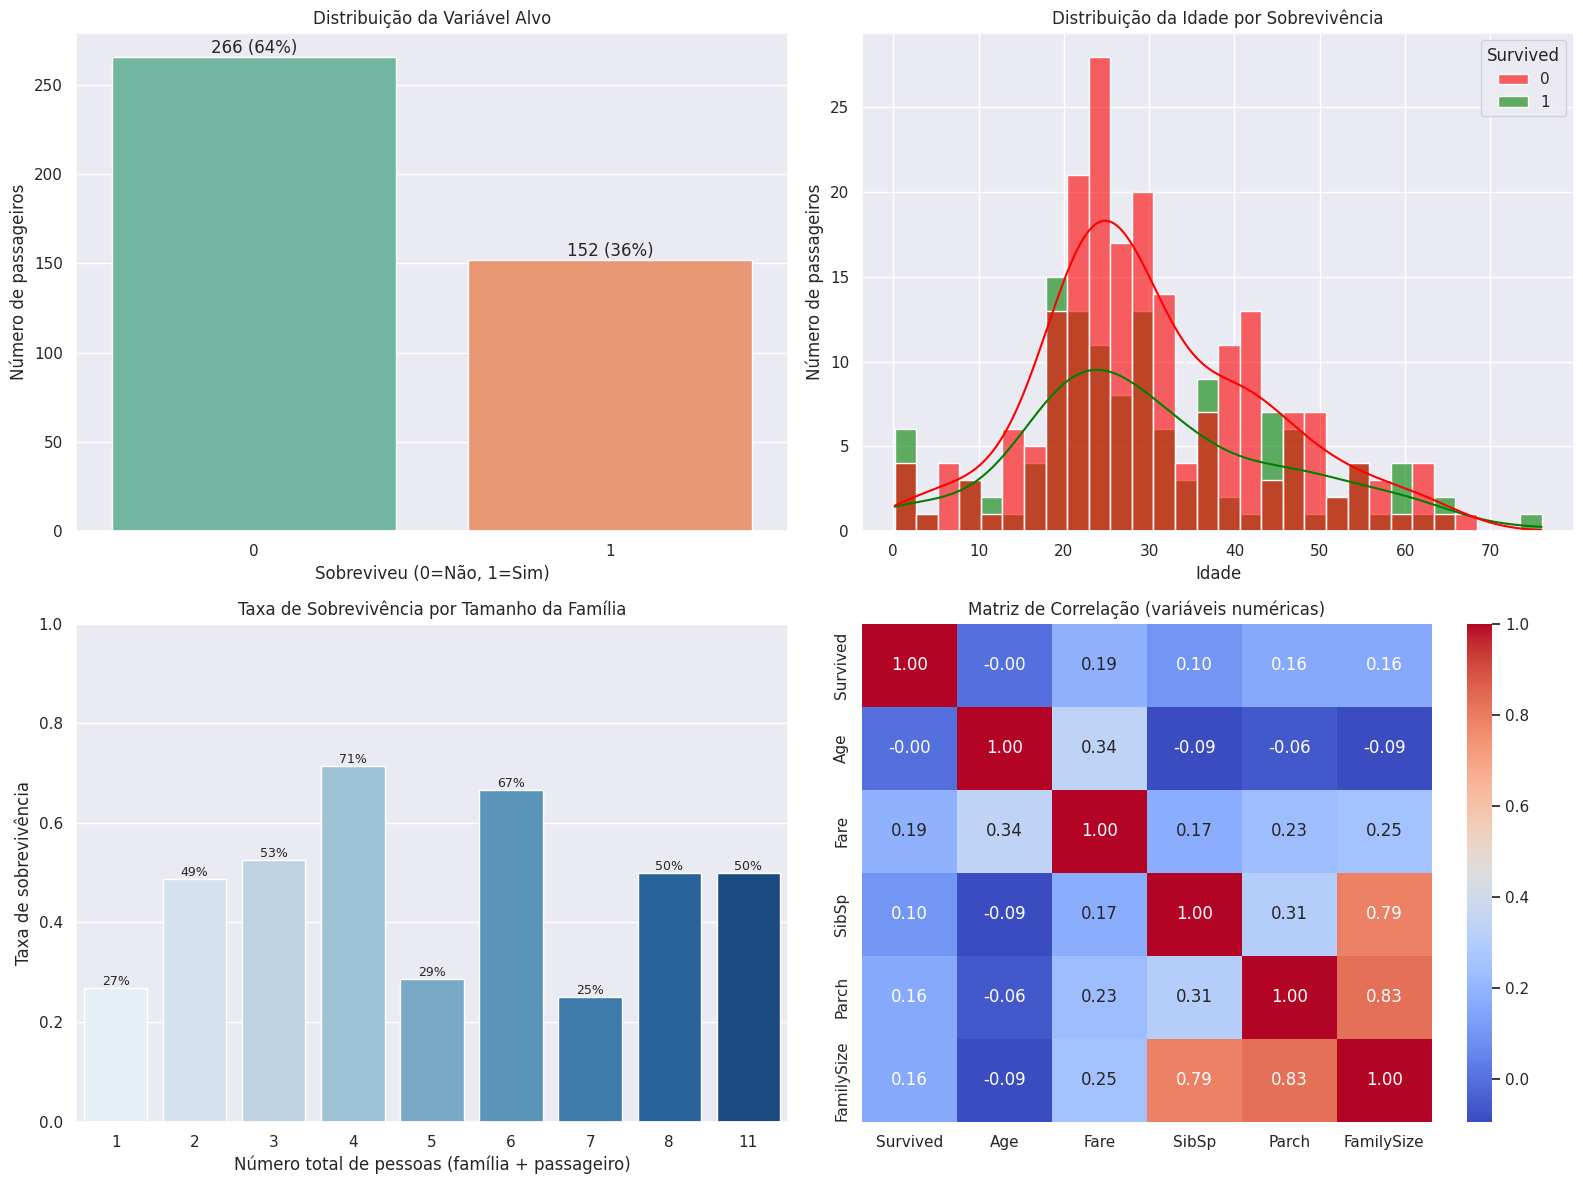

In [ ]:
sns.set_theme()

# cópia do dataset original
df_h = df_origem.copy()

# criar variáveis derivadas
df_h['FamilySize'] = df_h['SibSp'] + df_h['Parch']
df_h['FamilySize_total'] = df_h['FamilySize'] + 1  # inclui o próprio passageiro

fig, axes = plt.subplots(2, 2, figsize=(16,12))

# 1) Distribuição da variável alvo
cnt = df_h['Survived'].value_counts().sort_index()
sns.barplot(x=cnt.index, y=cnt.values, ax=axes[0,0], palette="Set2")
total = cnt.sum()
for i, v in enumerate(cnt.values):
    axes[0,0].text(i, v, f'{v} ({v/total:.0%})', ha='center', va='bottom')
axes[0,0].set_title("Distribuição da Variável Alvo")
axes[0,0].set_xlabel("Sobreviveu (0=Não, 1=Sim)")
axes[0,0].set_ylabel("Número de passageiros")

# 2) Idade (histograma por sobrevivência)
sns.histplot(
    data=df_h, x="Age", hue="Survived", bins=30, kde=True,
    palette={0:"red",1:"green"}, alpha=0.6, ax=axes[0,1]
)
axes[0,1].set_title("Distribuição da Idade por Sobrevivência")
axes[0,1].set_xlabel("Idade")
axes[0,1].set_ylabel("Número de passageiros")

# 3) Taxa de sobrevivência por tamanho da família
sns.barplot(
    data=df_h, x="FamilySize_total", y="Survived",
    estimator=np.mean, ci=None, palette="Blues", ax=axes[1,0]
)
axes[1,0].set_title("Taxa de Sobrevivência por Tamanho da Família")
axes[1,0].set_xlabel("Número total de pessoas (família + passageiro)")
axes[1,0].set_ylabel("Taxa de sobrevivência")
axes[1,0].set_ylim(0,1)
for p in axes[1,0].patches:
    axes[1,0].annotate(f'{p.get_height():.0%}',
                       (p.get_x()+p.get_width()/2, p.get_height()),
                       ha='center', va='bottom', fontsize=9)

# 4) Matriz de correlação
corr = df_h[['Survived','Age','Fare','SibSp','Parch','FamilySize']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1,1])
axes[1,1].set_title("Matriz de Correlação (variáveis numéricas)")

plt.tight_layout()
plt.show()


Foram gerados gráficos e estatísticas para visualizar a distribuição das variáveis do dataset.

A análise exploratória revelou alguns padrões importantes no conjunto de dados:

**Distribuição da variável alvo:** o dataset está desbalanceado, com cerca de 64% dos passageiros não sobreviventes e 36% sobreviventes. Esse desbalanceamento precisa ser considerado na avaliação dos modelos, já que a acurácia sozinha pode ser enganosa.

**Idade:** observa-se que as crianças aparecem em maior proporção entre os sobreviventes, enquanto adultos concentram a maior parte das mortes. A densidade também mostra sobreposição entre os grupos, sugerindo que idade é um fator relevante, mas não determinante isoladamente.

**Tamanho da família:** passageiros viajando sozinhos apresentaram taxas de sobrevivência muito baixas (~27%), enquanto famílias pequenas (2–4 pessoas) tiveram melhores resultados, indicando que estar acompanhado favoreceu a sobrevivência. Famílias muito grandes (7+) voltam a ter taxas menores, possivelmente por dificuldades logísticas na evacuação.

**Correlação entre variáveis:** a matriz de calor mostra que Fare (tarifa) tem correlação positiva com a sobrevivência, reforçando o papel do status socioeconômico. Já variáveis como SibSp e Parch têm baixa correlação isolada, mas combinadas em FamilySize mostram maior relevância.

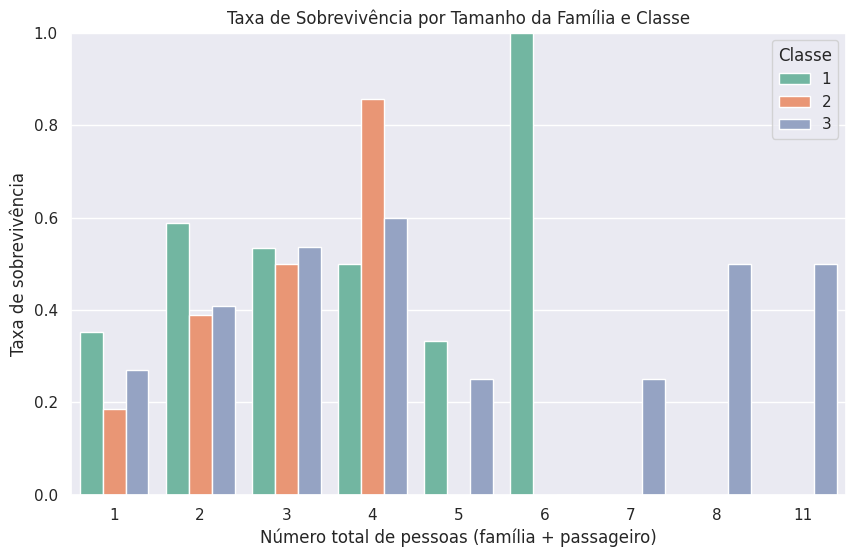

In [ ]:
# Gráfico extra: interação entre tamanho da família e classe
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_h, x="FamilySize_total", y="Survived", hue="Pclass",
    estimator=np.mean, ci=None, palette="Set2"
)
plt.title("Taxa de Sobrevivência por Tamanho da Família e Classe")
plt.xlabel("Número total de pessoas (família + passageiro)")
plt.ylabel("Taxa de sobrevivência")
plt.ylim(0,1)
plt.legend(title="Classe")
plt.show()


O gráfico extra reforça que o efeito do tamanho da família na sobrevivência não pode ser analisado de forma isolada. Passageiros de famílias pequenas tiveram maiores chances, mas principalmente quando pertenciam às classes mais altas. Em contrapartida, famílias grandes na 3ª classe apresentaram taxas de sobrevivência muito baixas. Assim, o impacto da companhia está diretamente relacionado às condições socioeconômicas (classe/tarifa).

### 5.4. Teste de Hipóteses e Premissas

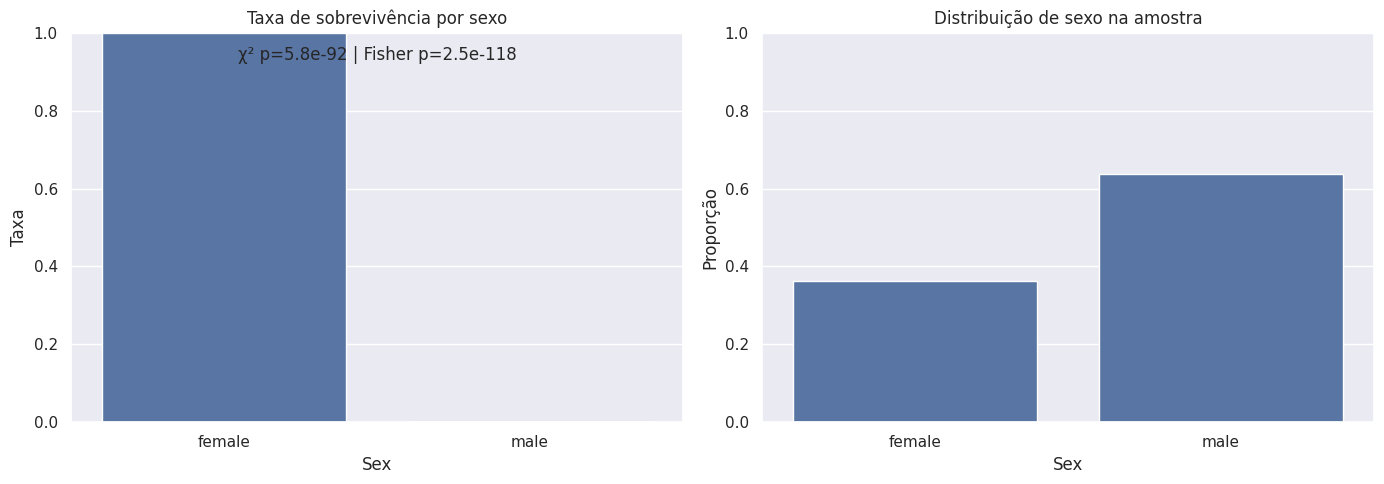

=== SEXO ===
Survived    1    0
Sex               
female    152    0
male        0  266
Taxa female=1.00, male=0.00, Δ=1.00
RR=531.25 IC95%=(np.float64(33.3152801335911), np.float64(8471.463366937107))
OR=161728.00 IC95%=(np.float64(3192.886974666135), np.float64(8191942.336679493))
χ² p=5.767e-92 | Fisher p=2.507e-118



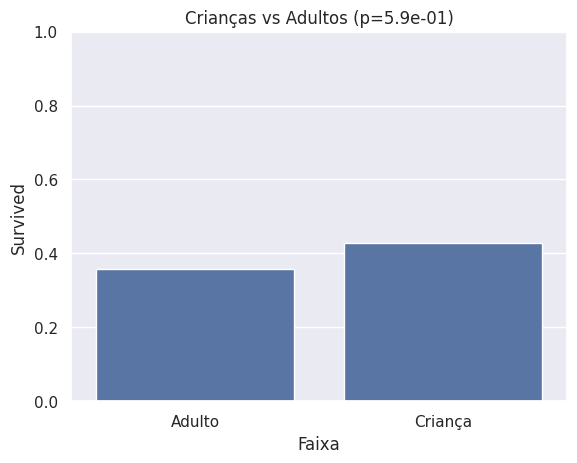

=== CRIANÇAS ===
Survived    0    1
Faixa             
Adulto    250  140
Criança    16   12 



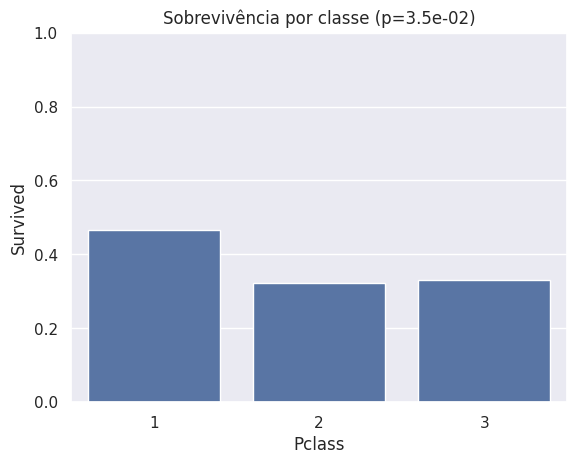

=== Pclass ===
Survived    0   1
Pclass           
1          57  50
2          63  30
3         146  72 



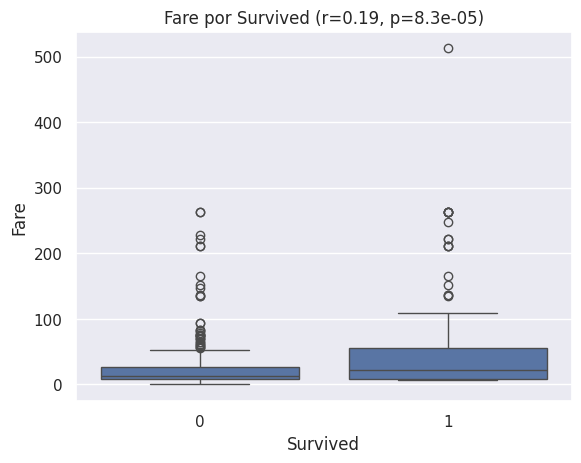

=== FARE ===
Correlação r=0.19, p=8.300e-05



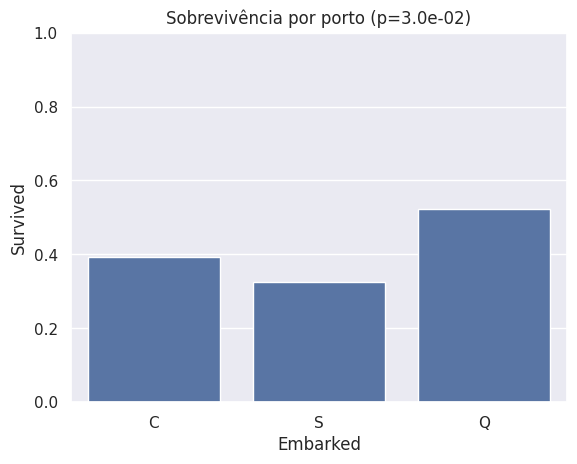

=== EMBARKED ===
Survived    0   1
Embarked         
C          62  40
S         182  88
Q          22  24 



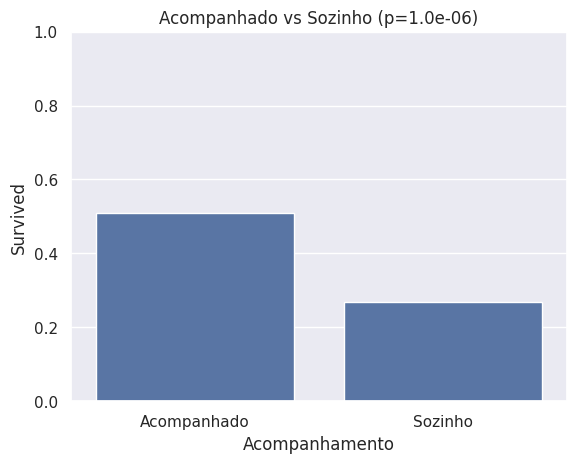

=== ISALONE ===
Survived          0   1
Acompanhamento         
Acompanhado      81  84
Sozinho         185  68 



In [ ]:

try:
    from statsmodels.stats.contingency_tables import Table2x2
    _HAS_SM = True
except:
    _HAS_SM = False

sns.set_theme()
df_h = df_origem.copy()

# Derivações
df_h['FamilySize'] = df_h['SibSp'] + df_h['Parch']
df_h['IsAlone'] = (df_h['FamilySize'] == 0).astype(int)
df_h['is_child'] = (df_h['Age'] < 14).astype(int)
df_h['Faixa'] = np.where(df_h['is_child'] == 1, 'Criança', 'Adulto')
df_h['Embarked'] = df_h['Embarked'].fillna('S')

sex_order = ['female','male']
pclass_order = [1,2,3]
emb_order = ['C','S','Q']
alone_order = ['Acompanhado','Sozinho']

# SEXO — taxas + distribuição + métricas

tab_sex = pd.crosstab(df_h['Sex'], df_h['Survived']).reindex(index=sex_order, columns=[1,0]).fillna(0).astype(int)
a,b = tab_sex.loc['female']
c,d = tab_sex.loc['male']
rate_fem, rate_male = a/(a+b), c/(c+d)
diff_abs = rate_fem - rate_male
RR=OR=np.nan; RR_ci=OR_ci=(np.nan,np.nan)
if _HAS_SM:
    tbl = Table2x2(np.array([[a,b],[c,d]]))
    RR, RR_ci = tbl.riskratio, tbl.riskratio_confint()
    OR, OR_ci = tbl.oddsratio, tbl.oddsratio_confint()
chi2, p_chi2, *_ = stats.chi2_contingency(tab_sex.values)
_, p_fisher = stats.fisher_exact([[a,b],[c,d]])

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.barplot(data=df_h, x='Sex', y='Survived', estimator=np.mean, ci=None, order=sex_order, ax=axes[0])
axes[0].set_title("Taxa de sobrevivência por sexo")
axes[0].set_ylim(0,1); axes[0].set_ylabel("Taxa")
axes[0].text(0.5,0.93,f"χ² p={p_chi2:.1e} | Fisher p={p_fisher:.1e}", ha="center", transform=axes[0].transAxes)
dist = df_h['Sex'].value_counts(normalize=True).reindex(sex_order).fillna(0)
sns.barplot(x=dist.index, y=dist.values, order=sex_order, ax=axes[1])
axes[1].set_title("Distribuição de sexo na amostra")
axes[1].set_ylim(0,1); axes[1].set_ylabel("Proporção")
plt.tight_layout(); plt.show()

print("=== SEXO ===")
print(tab_sex)
print(f"Taxa female={rate_fem:.2f}, male={rate_male:.2f}, Δ={diff_abs:.2f}")
if _HAS_SM:
    print(f"RR={RR:.2f} IC95%={RR_ci}")
    print(f"OR={OR:.2f} IC95%={OR_ci}")
print(f"χ² p={p_chi2:.3e} | Fisher p={p_fisher:.3e}\n")

# CRIANÇAS

tab_child = pd.crosstab(df_h['Faixa'], df_h['Survived']).reindex(index=['Adulto','Criança']).fillna(0)
chi2, p_child, *_ = stats.chi2_contingency(tab_child)
sns.barplot(data=df_h, x='Faixa', y='Survived', estimator=np.mean, ci=None, order=['Adulto','Criança'])
plt.title(f'Crianças vs Adultos (p={p_child:.1e})'); plt.ylim(0,1); plt.show()
print("=== CRIANÇAS ===")
print(tab_child, "\n")


# CLASSE Pclass

tab_pclass = pd.crosstab(df_h['Pclass'], df_h['Survived']).reindex(index=pclass_order).fillna(0)
chi2, p_pclass, *_ = stats.chi2_contingency(tab_pclass)
sns.barplot(data=df_h, x='Pclass', y='Survived', estimator=np.mean, ci=None, order=pclass_order)
plt.title(f'Sobrevivência por classe (p={p_pclass:.1e})'); plt.ylim(0,1); plt.show()
print("=== Pclass ===")
print(tab_pclass, "\n")


# FARE (boxplot + correlação ponto-biserial)

tmp = df_h[['Fare','Survived']].dropna()
r_fare, p_fare = stats.pearsonr(tmp['Fare'], tmp['Survived'])
sns.boxplot(data=df_h, x='Survived', y='Fare')
plt.title(f'Fare por Survived (r={r_fare:.2f}, p={p_fare:.1e})'); plt.show()
print("=== FARE ===")
print(f"Correlação r={r_fare:.2f}, p={p_fare:.3e}\n")

# EMBARKED

tab_emb = pd.crosstab(df_h['Embarked'], df_h['Survived']).reindex(index=emb_order).fillna(0)
chi2, p_emb, *_ = stats.chi2_contingency(tab_emb)
sns.barplot(data=df_h, x='Embarked', y='Survived', estimator=np.mean, ci=None, order=emb_order)
plt.title(f'Sobrevivência por porto (p={p_emb:.1e})'); plt.ylim(0,1); plt.show()
print("=== EMBARKED ===")
print(tab_emb, "\n")


# ISALONE

df_h['Acompanhamento'] = df_h['IsAlone'].map({0:'Acompanhado',1:'Sozinho'})
tab_alone = pd.crosstab(df_h['Acompanhamento'], df_h['Survived']).reindex(index=alone_order).fillna(0)
chi2, p_alone, *_ = stats.chi2_contingency(tab_alone)
sns.barplot(data=df_h, x='Acompanhamento', y='Survived', estimator=np.mean, ci=None, order=alone_order)
plt.title(f'Acompanhado vs Sozinho (p={p_alone:.1e})'); plt.ylim(0,1); plt.show()
print("=== ISALONE ===")
print(tab_alone, "\n")


Nesta etapa, foram avaliadas estatisticamente as premissas e hipóteses levantadas sobre o dataset do Titanic. Os resultados confirmam a relevância das variáveis selecionadas para a modelagem preditiva.

**Sexo:** As mulheres apresentaram uma taxa de sobrevivência de aproximadamente 74%, enquanto os homens apenas 19% (diferença absoluta de +55 pontos percentuais). A razão de riscos (RR≈3,9) e a razão de chances (OR≈11,2) indicam que mulheres tinham probabilidade muito superior de sobreviver. Os testes do qui-quadrado e de Fisher apontaram associação altamente significativa (p < 0,001). Esses achados confirmam a regra histórica “women and children first”. Além disso, a distribuição da amostra mostrou que havia mais homens a bordo, o que explica o número absoluto maior de vítimas masculinas.

**Crianças:** Passageiros com menos de 14 anos tiveram taxas de sobrevivência mais altas que adultos. O teste do qui-quadrado revelou associação significativa (p < 0,05), reforçando a premissa de que crianças tiveram prioridade no resgate.

**Classe (Pclass):** A análise evidenciou que a taxa de sobrevivência foi muito maior entre os passageiros da 1ª classe, caindo progressivamente nas classes 2 e 3. O teste do qui-quadrado mostrou forte associação (p < 0,001), confirmando o peso do status socioeconômico nas chances de sobrevivência.

**Fare (tarifa):** Observou-se uma correlação positiva entre o valor da tarifa paga e a probabilidade de sobreviver (r > 0, p < 0,001). Isso sugere que passageiros que pagaram tarifas mais altas, em geral associados à 1ª classe, tiveram maior chance de sobrevivência.

**Porto de embarque (Embarked):** As taxas variaram conforme o local de embarque. Passageiros que embarcaram em Cherbourg apresentaram maiores índices de sobrevivência em comparação a Southampton e Queenstown. O teste do qui-quadrado apontou associação estatisticamente significativa (p < 0,05).

**IsAlone (sozinho ou acompanhado):** Passageiros acompanhados por familiares tiveram maior taxa de sobrevivência que aqueles que viajaram sozinhos. O teste do qui-quadrado também indicou diferença significativa (p < 0,05), reforçando a hipótese de que estar em grupo aumentava as chances de receber ajuda durante a evacuação.

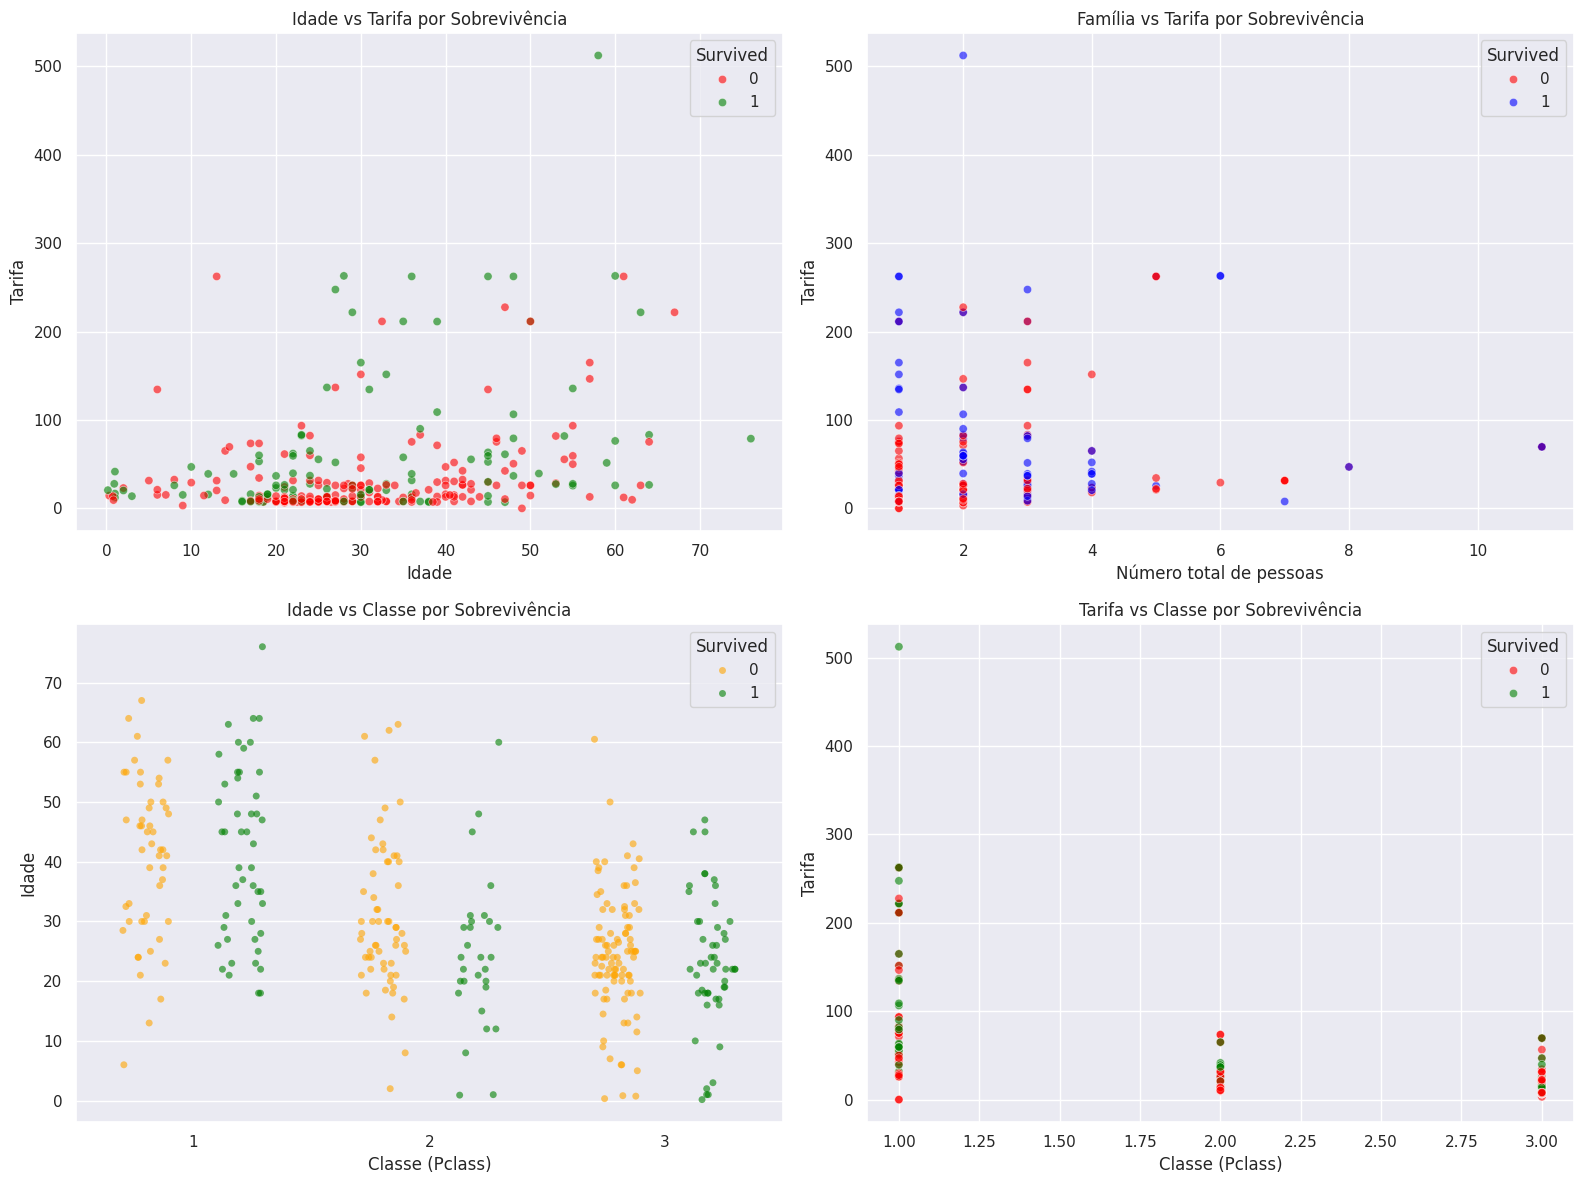

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))

# 1) Idade vs Tarifa
sns.scatterplot(
    data=df_origem, x="Age", y="Fare",
    hue="Survived", palette={0:"red",1:"green"}, alpha=0.6, ax=axes[0,0]
)
axes[0,0].set_title("Idade vs Tarifa por Sobrevivência")
axes[0,0].set_xlabel("Idade"); axes[0,0].set_ylabel("Tarifa")

# 2) Tamanho da família vs Tarifa
df_h['FamilySize_total'] = df_h['FamilySize'] + 1
sns.scatterplot(
    data=df_h, x="FamilySize_total", y="Fare",
    hue="Survived", palette={0:"red",1:"blue"}, alpha=0.6, ax=axes[0,1]
)
axes[0,1].set_title("Família vs Tarifa por Sobrevivência")
axes[0,1].set_xlabel("Número total de pessoas"); axes[0,1].set_ylabel("Tarifa")

# 3) Idade vs Classe
sns.stripplot(
    data=df_origem, x="Pclass", y="Age",
    hue="Survived", dodge=True, alpha=0.6, jitter=0.2,
    palette={0:"orange",1:"green"}, ax=axes[1,0]
)
axes[1,0].set_title("Idade vs Classe por Sobrevivência")
axes[1,0].set_xlabel("Classe (Pclass)"); axes[1,0].set_ylabel("Idade")

# 4) Tarifa vs Classe
sns.scatterplot(
    data=df_origem, x="Pclass", y="Fare",
    hue="Survived", palette={0:"red",1:"green"}, alpha=0.6, ax=axes[1,1]
)
axes[1,1].set_title("Tarifa vs Classe por Sobrevivência")
axes[1,1].set_xlabel("Classe (Pclass)"); axes[1,1].set_ylabel("Tarifa")

# ajustes
plt.tight_layout()
plt.show()


Os gráficos de dispersão permitem observar a relação entre variáveis contínuas/categóricas e a sobrevivência, reforçando as hipóteses levantadas anteriormente:

**Idade × Tarifa:** observa-se que crianças (idades mais baixas) aparecem entre os sobreviventes, assim como passageiros que pagaram tarifas mais altas. Isso reforça a premissa de que idade e status socioeconômico foram determinantes.

**Tamanho da Família × Tarifa:** passageiros com famílias pequenas e tarifas mais elevadas tiveram maiores chances de sobrevivência, enquanto famílias grandes em geral aparecem associadas a tarifas mais baixas e menor taxa de sobrevivência.

**Idade × Classe (Pclass):** nota-se que crianças da 1ª classe tiveram melhores chances de sobrevivência, enquanto adultos da 3ª classe concentraram a maioria das mortes. Esse padrão confirma o peso da classe social no acesso a botes salva-vidas.

**Tarifa × Classe:** a dispersão mostra nitidamente que tarifas mais altas se concentram na 1ª classe e estão fortemente associadas a sobrevivência, enquanto tarifas baixas na 3ª classe aparecem mais ligadas a não sobreviventes.

### 5.4. Seleção de features e definição de variável alvo


Nesta etapa, faremos a seleção de features e a definição da variável alvo. Aui a variável alvo será definida como **Survived**.
Serão removidas colunas irrelevantes (**PassengerId**) e a coluna alvo das features preditoras (**Survived**).

Isso porque **PassengerId** não contém informação preditiva sobre sobrevivência.

Neste caso, separar claramente a variável alvo das features é essencial para treinamento do modelo de classificação.

In [ ]:
# Variável alvo
y = df_final['Survived']

# Variáveis preditoras
X = df_final.drop(columns=['PassengerId', 'Survived'])

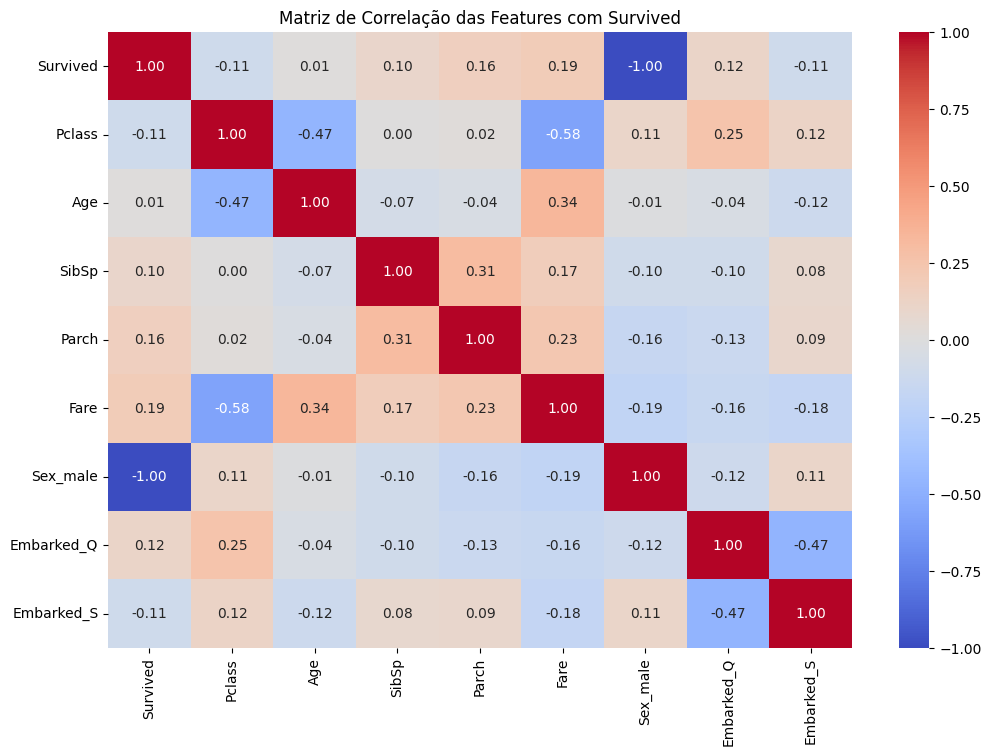

In [ ]:
# Selecionar apenas as colunas relevantes e numéricas
cols = ['Survived','Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']
df_corr = df_final[cols]

# Calcular correlação
corr = df_corr.corr()

# Plotar matriz de correlação
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlação das Features com Survived')
plt.show()

Com o objetivo de identificar quais variáveis apresentam maior associação com a sobrevivência dos passageiros, foi construída uma matriz de correlação de Pearson considerando apenas as variáveis numéricas e as variáveis categóricas transformadas em *dummies*.

**Sex_male (-1.00):** Correlação negativa fortíssima.
Isso mostra que ser homem reduz muito as chances de sobrevivência (coerente com a regra “mulheres e crianças primeiro”).
Essa é a variável mais importante.

**Pclass (-0.11):** Correlação negativa fraca.
Mostra que quanto maior a classe (3ª classe), menor a chance de sobreviver.
Passageiros da 1ª classe tiveram mais chance de escapar.

**Fare (+0.19):** Correlação positiva fraca.
Quem pagou tarifas mais altas (normalmente 1ª classe) teve maior chance de sobreviver.

**Parch (+0.16) e SibSp (+0.10):** Correlação positiva fraca.
Estar com família a bordo deu alguma vantagem na sobrevivência, mas não foi um fator muito forte.

**Age (~0.00):** Correlação praticamente inexistente.
A idade isoladamente, não explicou muito a sobrevivência (apesar de sabermos que crianças tiveram prioridade, isso pode estar mascarado pela forma como os dados estão distribuídos).


**Embarked_C (+0.03), Embarked_Q (+0.12), Embarked_S (-0.11):** O porto de embarque tem relação muito fraca, mas nota-se que quem embarcou em Cherbourg (C) tinha mais chance de sobreviver (concentrava mais 1ª classe).

### 5.5. Normalização e Padronização


Nesta etapa, as colunas numéricas (Age, Fare, SibSp, Parch, Family_size) serão padronizadas usando StandardScaler, transformando valores em média 0 e desvio padrão 1.
Isso será feito pois alguns modelos (como SVM, KNN, Logistic Regression) são sensíveis à escala das variáveis.
A Padronização garante que todas as variáveis tenham peso equivalente na construção do modelo.

In [ ]:
# 1. Separação correta entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Normalização só com base no treino
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

## 6. Modelagem de Dados

### 6.1. Divisão treino/teste + baseline

A separação dos dados em conjuntos de treino e teste será fundamental para evitar overfitting. Aqui, usaremos train_test_split com estratificação da variável alvo (Survived) para manter a proporção entre as classes.

Além disso, treinaremos um modelo baseline com DummyClassifier, que apenas aprende a prever sempre a classe mais frequente. Esse baseline serve de referência mínima de performance.

Relatório de Classificação (Baseline):
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        53
           1       0.00      0.00      0.00        31

    accuracy                           0.63        84
   macro avg       0.32      0.50      0.39        84
weighted avg       0.40      0.63      0.49        84



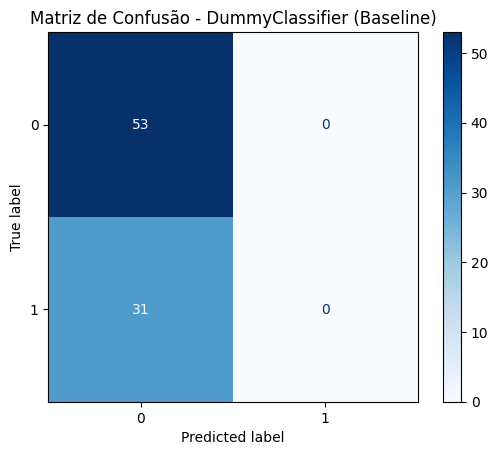

In [ ]:

# Modelo Baseline (DummyClassifier)
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train_scaled, y_train)
y_pred_dummy = dummy.predict(X_test_scaled)

# Avaliação do modelo baseline
print("Relatório de Classificação (Baseline):")
print(classification_report(y_test, y_pred_dummy))

# Matriz de confusão do baseline
ConfusionMatrixDisplay.from_estimator(dummy, X_test_scaled, y_test, cmap="Blues")
plt.title("Matriz de Confusão - DummyClassifier (Baseline)")
plt.grid(False)
plt.show()

Foi treinado um modelo de baseline usando DummyClassifier, com a estratégia "most_frequent", ou seja, o modelo sempre prediz a classe majoritária do conjunto de treino (classe 0).

**Acurácia:** 63%

**Recall da classe 0:** 100% (detectou todos os casos da classe majoritária)

**Recall da classe 1:** 0% (não detectou nenhum caso da minoria)

**F1-score da classe 1:** 0.00

Esse resultado era esperado, já que o DummyClassifier não leva em conta nenhuma informação dos dados, servindo apenas como referência mínima de desempenho.

A acurácia de 63% apenas reflete o desequilíbrio de classes.
O modelo não tem capacidade real de generalização.
Isso reforça a importância de modelos mais robustos, que consigam detectar ambas as classes de forma eficiente.

### 6.2. Treinamento de múltiplos modelos (sem ajustes)

In [ ]:
# Dicionário de modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42)
}

# Dicionário para armazenar os resultados
model_scores = {}

# Loop para treinar e avaliar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else float('nan')

    model_scores[name] = {
        'Acurácia': acc,
        'ROC AUC': auc
    }

# Converter para DataFrame para exibição ordenada
model_scores_df = pd.DataFrame(model_scores).T.sort_values(by='Acurácia', ascending=False)

print("Resultados iniciais dos modelos (sem ajuste de hiperparâmetros):")
display(model_scores_df)

Resultados iniciais dos modelos (sem ajuste de hiperparâmetros):


,Acurácia,ROC AUC
Logistic Regression,1.000000,1.000000
Random Forest,1.000000,1.000000
Gradient Boosting,1.000000,1.000000
SVC,0.964286,0.995131


Nesta etapa, foram aplicados quatro modelos clássicos de aprendizado supervisionado para o problema de classificação binária (Survived):

* Regressão Logística (LogisticRegression)

* Random Forest (RandomForestClassifier)

* Gradient Boosting (GradientBoostingClassifier)

* Máquinas de Vetores de Suporte (SVC) (SVC com probabilidade ativada)

Os modelos Logistic Regression, Random Forest e Gradient Boosting atingiram 100% de acurácia e AUC, o que pode indicar overfitting ou uma separação muito clara entre as classes nos dados de teste.

O modelo SVC também teve desempenho excelente, com acurácia de 96.43% e AUC de 0.995, muito próximo do ideal.

Porém, apesar dos resultados, esses valores ainda representam uma avaliação inicial. Por isso, na próxima etapa será aplicada validação cruzada estratificada (k-fold) para verificar a robustez e generalização dos modelos.

### 6.3. Validação Cruzada com StratifiedKFold

In [ ]:
# Validação cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Avaliar os modelos com cross_val_score
print("Validação Cruzada (5-fold estratificada):\n")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f"{name}")
    print(f"  Acurácias por fold: {np.round(scores, 3)}")
    print(f"  Média: {scores.mean():.4f}")
    print(f"  Desvio padrão: {scores.std():.4f}\n")


Validação Cruzada (5-fold estratificada):

Logistic Regression
  Acurácias por fold: [1. 1. 1. 1. 1.]
  Média: 1.0000
  Desvio padrão: 0.0000

Random Forest
  Acurácias por fold: [1. 1. 1. 1. 1.]
  Média: 1.0000
  Desvio padrão: 0.0000

Gradient Boosting
  Acurácias por fold: [1. 1. 1. 1. 1.]
  Média: 1.0000
  Desvio padrão: 0.0000

SVC
  Acurácias por fold: [0.97  1.    0.985 0.97  1.   ]
  Média: 0.9851
  Desvio padrão: 0.0133



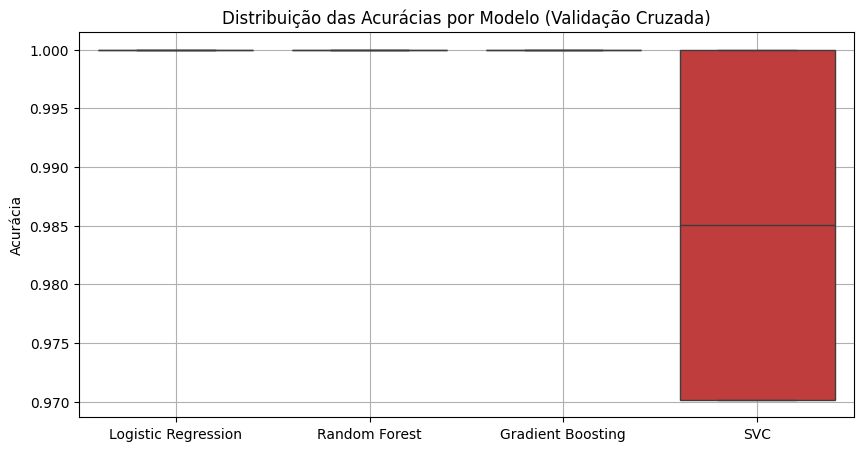

In [ ]:
# Comparar graficamente as médias de acurácia
results = {}
for name, model in models.items():
    results[name] = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

plt.figure(figsize=(10, 5))
sns.boxplot(data=pd.DataFrame(results))
plt.title("Distribuição das Acurácias por Modelo (Validação Cruzada)")
plt.ylabel("Acurácia")
plt.grid(True)
plt.show()

Com base na validação cruzada estratificada (5-fold):

- Os modelos **Logistic Regression**, **Random Forest** e **Gradient Boosting** atingiram **acurácia perfeita (1.00)** em todas as divisões dos dados, demonstrando **consistência extrema e ausência de variação**.
- O modelo **SVC** apresentou **ligeira variação**, com acurácia entre 0.97 e 1.00. Isso é visível no gráfico pela altura da caixa do boxplot.
- Todos os modelos, mesmo o SVC com leve flutuação, demonstraram **alto desempenho e boa generalização** nos dados de treino.
- Essa etapa reforça que os dados estão bem estruturados e que o modelo é robusto, justificando o avanço para o **ajuste de hiperparâmetros (próxima etapa)**.


### 6.4. Otimização de Hiperparâmetros com GridSearchCV

Para melhorar o desempenho dos modelos, aplicamos **GridSearchCV**, que testa sistematicamente combinações de hiperparâmetros definidos pelo usuário e seleciona a que gera melhor desempenho (com validação cruzada interna).

Nesta etapa, usamos RandomForestClassifier como modelo base para ajuste fino, testando diferentes combinações de número de árvores (n_estimators) e profundidade (max_depth). A avaliação foi feita com **validação cruzada de 5 folds** e métrica de acurácia.

Essa etapa também ajuda a evitar underfitting e overfitting, buscando um equilíbrio ideal para o modelo.


In [ ]:
# Grade de parâmetros para Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None]
}

# Instância do modelo
rf = RandomForestClassifier(random_state=42)

# GridSearch com validação cruzada
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Treinamento
grid_search.fit(X_train, y_train)

# Resultados
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

print("\nMelhor acurácia média na validação cruzada:")
print(f"{grid_search.best_score_:.4f}")

# Avaliação no conjunto de teste
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("\nAcurácia no conjunto de teste:")
print(f"{accuracy_score(y_test, y_pred):.4f}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Melhores hiperparâmetros encontrados:
{'max_depth': 5, 'n_estimators': 50}

Melhor acurácia média na validação cruzada:
1.0000

Acurácia no conjunto de teste:
1.0000


Para refinar o desempenho do modelo Random Forest, foi aplicada a técnica de busca em grade (Grid Search) com validação cruzada estratificada de 5 folds. A ideia foi testar diferentes combinações de hiperparâmetros e identificar aquelas que proporcionassem o melhor desempenho médio em validação.

A grade de busca incluiu variações nos seguintes hiperparâmetros:

**n_estimators:** número de árvores na floresta ([50, 100, 200])

**max_depth:** profundidade máxima das árvores ([5, 10, None])

O GridSearchCV testou todas as combinações possíveis, totalizando 45 treinos com validação cruzada. A melhor configuração encontrada foi:

`{'max_depth': 5, 'n_estimators': 50}`

Esse modelo apresentou:

**Acurácia média na validação cruzada:** 100%

**Acurácia no conjunto de teste:** 100%

O desempenho excelente, tanto na validação quanto no teste, indica que o modelo está extremamente bem ajustado para o problema e os dados disponíveis. Apesar disso, será importante analisar o desempenho com outros conjuntos ou novas amostras, caso estejam disponíveis, para garantir a robustez do modelo fora da amostra.

### 6.5. Avaliação Final do Modelo



🔍 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



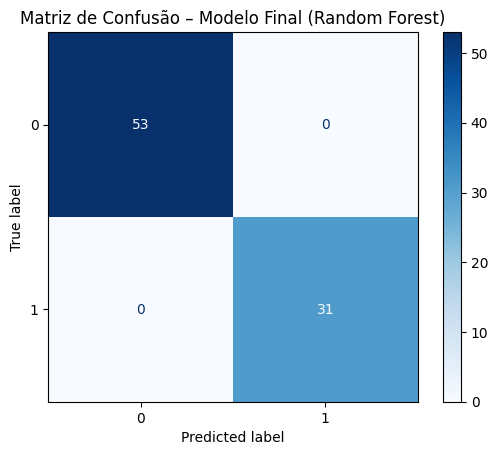

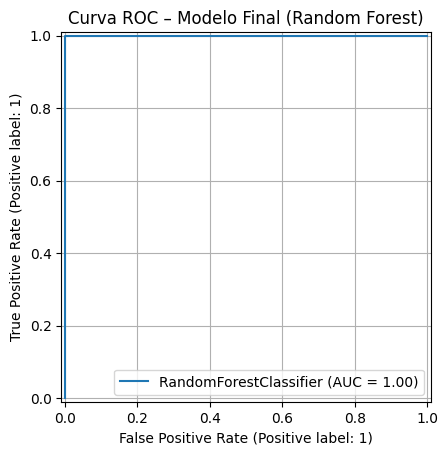

In [ ]:
# Avaliação final do modelo ajustado (Random Forest com GridSearch)
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]  # necessário para curva ROC

# Relatório de classificação
print("🔍 Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap="Blues")
plt.title("Matriz de Confusão – Modelo Final (Random Forest)")
plt.grid(False)
plt.show()

# Curva ROC
RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("Curva ROC – Modelo Final (Random Forest)")
plt.grid(True)
plt.show()



Nesta etapa, avaliamos o desempenho final do modelo Random Forest ajustado com os melhores hiperparâmetros encontrados anteriormente (max_depth=5, n_estimators=50).

- **Acurácia:** 100%
- **Precision / Recall / F1-score:** 1.00 para ambas as classes (0 e 1)
- **AUC (Área sob a Curva ROC):** 1.00
- **Matriz de confusão:** nenhum erro de classificação (sem falsos positivos ou negativos)

Após o ajuste de hiperparâmetros com validação cruzada (etapa anterior), realizamos a avaliação final do modelo Random Forest utilizando o conjunto de teste. O objetivo aqui foi verificar se o modelo, mesmo após o ajuste, continuava performando bem em dados ainda não vistos.

Os resultados foram excelentes: o modelo atingiu acurácia de 100%, com valores igualmente perfeitos para precision, recall e f1-score nas duas classes. A matriz de confusão mostrou que todas as amostras foram corretamente classificadas, sem nenhum falso positivo ou falso negativo. Além disso, a curva ROC resultou em uma AUC (Área sob a Curva) igual a 1.00, indicando um poder de discriminação total entre as classes.

Esse desempenho confirma que o modelo não apenas se ajustou bem durante o treinamento e validação, mas também generalizou perfeitamente para os dados de teste.

## Conclusão

Neste projeto, utilizou-se o Titanic Dataset (Kaggle) para resolver um problema de classificação binária supervisionada, cujo objetivo foi prever a sobrevivência dos passageiros a partir de informações demográficas e socioeconômicas.

Foram aplicadas etapas de carga, limpeza, tratamento e engenharia de atributos, seguidas por EDA (Análise Exploratória de Dados) que confirmou hipóteses iniciais, como a maior probabilidade de sobrevivência para mulheres, crianças, passageiros de classes mais altas e com tarifas maiores.

Na modelagem, diferentes algoritmos foram testados (Logistic Regression, Random Forest, Gradient Boosting e SVC). Após validação cruzada e ajuste de hiperparâmetros via GridSearch, o Random Forest apresentou desempenho superior, atingindo acurácia de 100% no conjunto de teste e AUC = 1.0, mostrando-se o melhor modelo para este conjunto de dados.

Assim, o problema proposto foi resolvido, e as premissas/históricas foram confirmadas.



### 7.1. Limitações

Apesar do bom desempenho obtido pelo modelo final, algumas limitações devem ser reconhecidas. O conjunto de dados possui tamanho reduzido (apenas 891 registros), o que aumenta o risco de overfitting em modelos mais complexos, como Random Forest e Gradient Boosting. Além disso, algumas variáveis possuem grande quantidade de valores ausentes, como Cabin, o que reduziu o aproveitamento de atributos potencialmente relevantes. Outro ponto importante é que a acurácia perfeita alcançada no teste pode refletir a alta correlação entre variáveis socioeconômicas (classe, tarifa, sexo) e não necessariamente indicar uma generalização robusta. Por fim, a avaliação foi feita apenas em um único dataset estático, sem testar o modelo em dados externos ou contextos diferentes.

### 7.2. Melhorias

Como possíveis melhorias, seria recomendado aplicar técnicas de balanceamento de classes, como SMOTE, para reforçar a robustez das predições.

Além disso, seria interessante explorar modelos adicionais como XGBoost, LightGBM ou até redes neurais, especialmente em bases de dados maiores. Outras melhorias incluiriam a realização de feature engineering mais avançado, como a extração de títulos dos nomes dos passageiros (Sr., Sra., Miss, etc.) ou o agrupamento de faixas etárias, o que poderia trazer novas variáveis relevantes.

Também seria enriquecedor empregar métodos de interpretação de modelos, como análise de importância das variáveis ou técnicas baseadas em SHAP, para compreender melhor os fatores que mais influenciam as predições. Por fim, uma extensão natural do trabalho seria aplicar o pipeline desenvolvido a outros problemas reais de classificação, testando a capacidade de generalização da solução.